✅ Data imported into 'sales_data.db' in table 'sales'.

📊 Sales Summary by Product:
                                    product_name  total_units  total_revenue
0                            Canon EOS R5 Camera            1        3899.99
1                                     LG OLED TV            2        2599.98
2                            MacBook Pro 16-inch            1        2499.99
3                      Apple MacBook Pro 16-inch            1        2399.00
4                                  iPhone 14 Pro            2        1999.98
..                                           ...          ...            ...
227             Neutrogena Hydro Boost Water Gel            1          16.99
228  Biore UV Aqua Rich Watery Essence Sunscreen            1          15.00
229           The Ordinary Hyaluronic Acid Serum            1           6.80
230     The Ordinary Caffeine Solution 5% + EGCG            1           6.70
231               The Ordinary Niacinamide Serum            1        

<Figure size 1000x600 with 0 Axes>

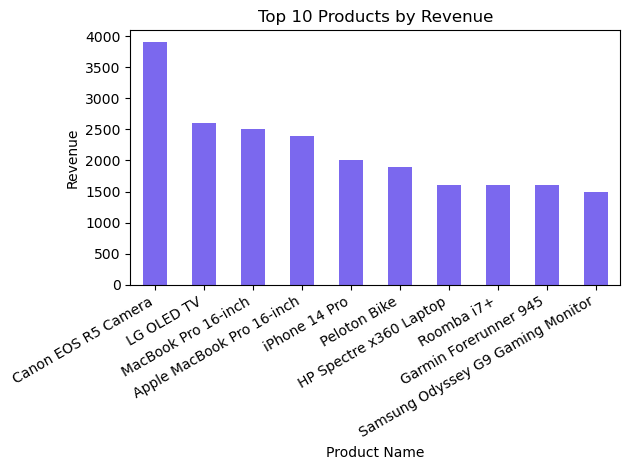

📈 Clean chart saved as 'top10_product_revenue_chart.png'


In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import os

# Step 1: Define CSV file name
csv_file = "Online Sales Data.csv"

# Check if file exists
if not os.path.exists(csv_file):
    print(f"Error: '{csv_file}' not found in current directory.")
    exit()

# Step 2: Load CSV into pandas DataFrame
df = pd.read_csv(csv_file)

# Step 3: Normalize column names
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

# Step 4: Connect to SQLite and create database
db_file = "sales_data.db"
conn = sqlite3.connect(db_file)

# Step 5: Save data into a table named 'sales'
df.to_sql("sales", conn, if_exists="replace", index=False)
print(f"✅ Data imported into '{db_file}' in table 'sales'.")

# Step 6: Query total units sold and revenue per product
query = """
SELECT 
    product_name, 
    SUM(units_sold) AS total_units, 
    ROUND(SUM(total_revenue), 2) AS total_revenue 
FROM sales 
GROUP BY product_name 
ORDER BY total_revenue DESC
"""

summary_df = pd.read_sql_query(query, conn)
conn.close()

# Step 7: Print the summary
print("\n📊 Sales Summary by Product:")
print(summary_df)

# Step 8: Plot revenue by product
# 🔹 Limit to Top 10 products by revenue
top_df = summary_df.head(10)

# 🔹 Bar chart
plt.figure(figsize=(10, 6))
top_df.plot(kind='bar', x='product_name', y='total_revenue', legend=False, color='mediumslateblue')
plt.title("Top 10 Products by Revenue")
plt.ylabel("Revenue")
plt.xlabel("Product Name")
plt.xticks(rotation=30, ha='right')  # slight tilt for readability
plt.tight_layout()
plt.savefig("top10_product_revenue_chart.png")
plt.show()

print("📈 Clean chart saved as 'top10_product_revenue_chart.png'")

